#Data Visualization Using Matplotlib

###Demo 1: Plotting Different Types of Charts

In this demo, you will be shown how to plot different types of charts.

# Car Sales

Bob has sales data of his showroom. He wants to find the trends and various infromation using visualisation.

<h3><ul><li>Importing Libraries

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

<h3><ul><li>Reading Dataset

In [9]:
car=pd.read_csv('Car_sales.csv')
car.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Mitsubishi,3000GT,0.110,20.940000,Passenger,25.450,3.0,161.0,97.2,72.4,180.3,3.131,19.8,21.0,29-Jun-14
1,Dodge,Viper,0.916,58.470000,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,08-Jul-15
2,Mercedes-Benz,CL500,0.954,18.072975,Passenger,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,04-Nov-15
3,Oldsmobile,Cutlass,1.112,11.240000,Passenger,18.145,3.1,150.0,107.0,69.4,192.0,3.102,15.2,25.0,31-May-15
4,Porsche,Carrera Coupe,1.280,60.625000,Passenger,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,21-Dec-14


### 1. Line plot

In [12]:
#Sorting dataset by 'Sales in thousands'
car=car.sort_values('Sales in thousands')
car.head()

,Manufacturer,Model,Sales in thousands,4-year resale value,Vehicle type,Price in thousands,Engine size,Horsepower,Wheelbase,Width,Length,Curb weight,Fuel capacity,Fuel efficiency,Latest Launch
0,Mitsubishi,3000GT,0.110,20.940000,Passenger,25.450,3.0,161.0,97.2,72.4,180.3,3.131,19.8,21.0,29-Jun-14
1,Dodge,Viper,0.916,58.470000,Passenger,69.725,8.0,450.0,96.2,75.7,176.7,3.375,19.0,16.0,08-Jul-15
2,Mercedes-Benz,CL500,0.954,18.072975,Passenger,85.500,5.0,302.0,113.6,73.1,196.6,4.115,23.2,20.0,04-Nov-15
3,Oldsmobile,Cutlass,1.112,11.240000,Passenger,18.145,3.1,150.0,107.0,69.4,192.0,3.102,15.2,25.0,31-May-15
4,Porsche,Carrera Coupe,1.280,60.625000,Passenger,71.020,3.4,300.0,92.6,69.5,174.5,3.032,17.0,21.0,21-Dec-14


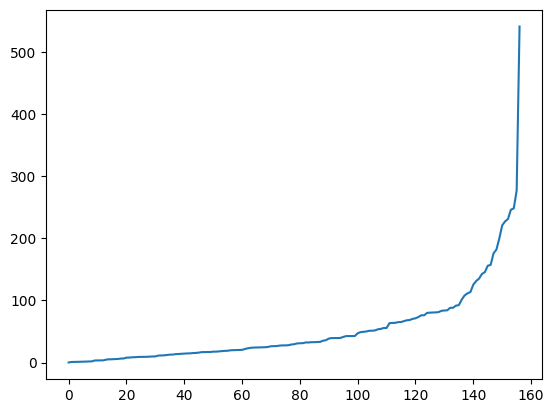

In [11]:
#Plotting simple line plot to see thre trend of 'Sales in thousands'
plt.plot(car['Sales in thousands']) # xaxis = row index, sales = y- axis
plt.show()

#### We can say that *'sales in thousands'* slowly increase from 0-120 then it spikes really high

### 2. Barplot

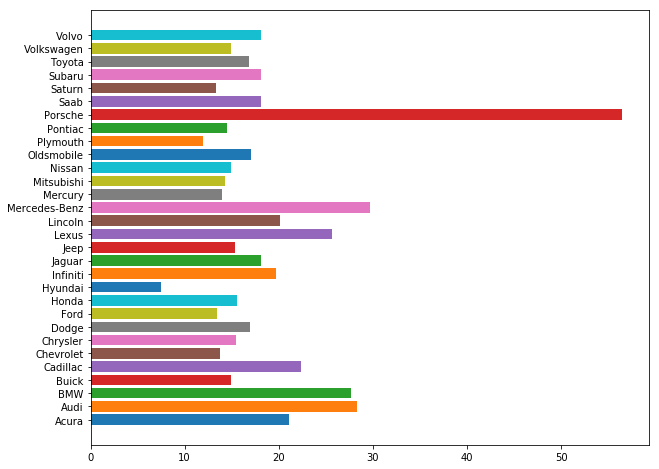

In [ ]:
#Mean 4-year resale value for each Manufacturer
plt.figure(figsize=(10,8)) # Creates a new figure and allows you to set different parameters like figuresize()
for group,data in car.groupby('Manufacturer'):
    plt.barh(group,data['4-year resale value'].mean())

#### We can see that most of the manufacturers do not have *'4-year resale value'* more than 20, only a few in the range of 20-30 while Porche has best *'4-year resale value'*.

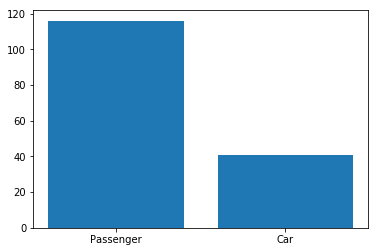

In [ ]:
#plotting Vehicle type Manufacturer make
vt_dict=dict() #initializing an empty dictionary 
for i in set(car['Vehicle type']):
    vt_dict[i]=car[car['Vehicle type']==i].Manufacturer.count() # adding passenger and car as keys for dictionary and updating the values 
plt.bar(vt_dict.keys(),vt_dict.values())
plt.show()

#### We can see that Manufacturers manufacture more number of *'Passenger'* type of cars

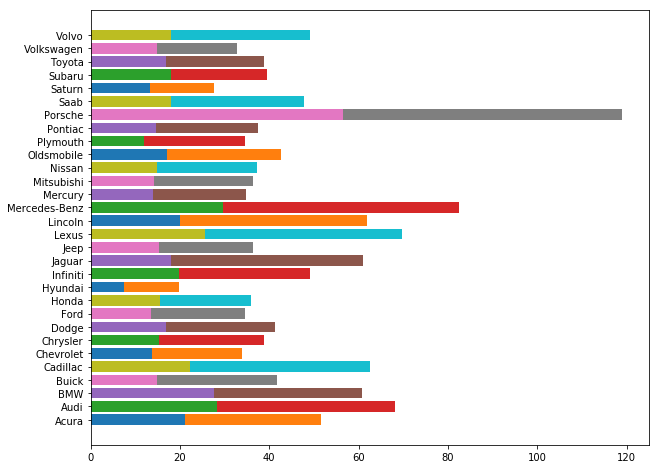

In [ ]:
#Mean 4-year resale value and Price in thousands for each Manufacturer 
plt.figure(figsize=(10,8))
for group,data in car.groupby('Manufacturer'):
    plt.barh(group,data['4-year resale value'].mean())
    plt.barh(group,data['Price in thousands'].mean(),left=data['4-year resale value'].mean())
    

- #### From the above stacked bar graph we can conclude that almost all the Manufacturer have bad resale value except for *'Porche'* which has almost equal value

- #### The stacked bar graph is quite confusing bescause of all the random colors and it is hard to analyse it. This can be fixed using fixed colors and legends which is covered in next demo.

## 3. Histogram

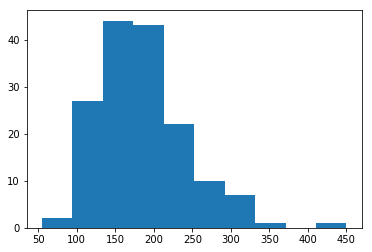

In [ ]:
car.Horsepower=car.Horsepower.fillna(car.Horsepower.mean()) #cleaning the data
plt.hist(car.Horsepower,bins=10)
plt.show()

#### From the above histogram we can say that most of the cars has horsepower between 100-200

## 4. Pie chart

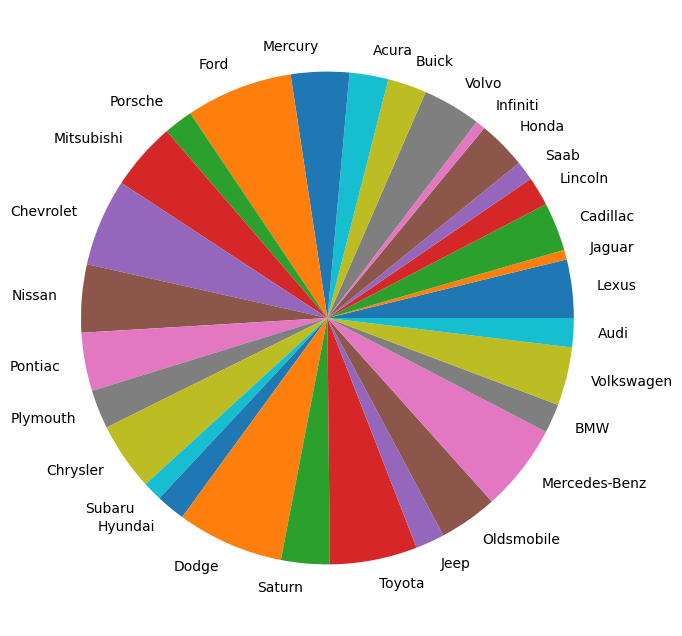

In [14]:
m_dict=dict()
plt.figure(figsize=(10,8))

for manufacturer in set(car.Manufacturer):
    m_dict[manufacturer]=car[car.Manufacturer==manufacturer].Manufacturer.count()
plt.pie(m_dict.values(),labels=m_dict.keys())
plt.show()

#### The pie chart shows that *'Ford'* and *'Dodge'* launched more number of models while *'Jaguar'* and *'infiniti'* launched very less

## 5. Scatter Plot

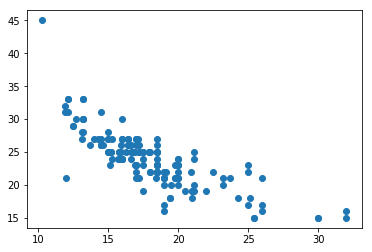

In [ ]:
plt.scatter(car['Fuel capacity'],car['Fuel efficiency'])

### From the above scatter plot we can see that as *'Fuel capacity'* increases the *'Fuel efficiency'* gradually decreases

## 6. Boxplot

In [ ]:
car['Curb weight'].isna().any() #checks if there are any missing (NaN) values in the 'Curb weight' column of the DataFrame car

True

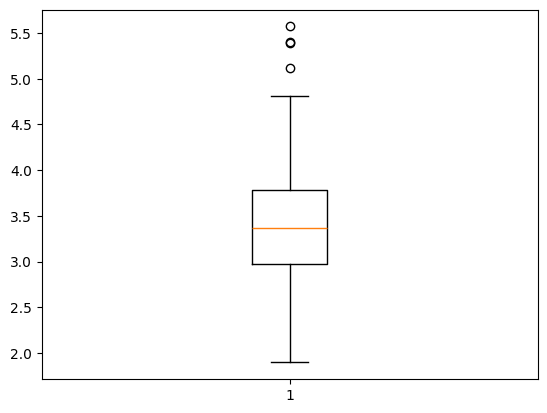

In [16]:
car['Curb weight']=car['Curb weight'].fillna(car['Curb weight'].mean())
plt.boxplot(car['Curb weight'])  # by default vert = true
plt.show()

In [ ]:
# Checking for any null values as boxplot will be empty if there are any  ull values
car.Wheelbase.isna().any()

True

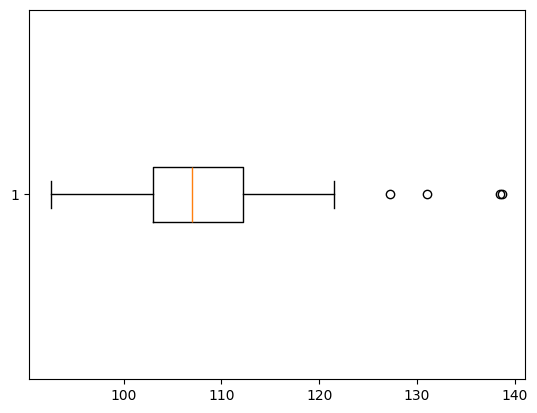

In [15]:
car.Wheelbase=car.Wheelbase.fillna(car.Wheelbase.mean())
plt.boxplot(car.Wheelbase, vert = False)
plt.show()

#### We can see most of the Wheelbases are around 100 -110 while some being exception i.e. outliers

##### Conclusion: This code demonstrates how to create different types charts in matplotlib.